### This code is a Python implementation of Monte Carlo simulation to estimate the risk of a portfolio consisting of a variety of stock options.

In [1]:
import numpy as np
import random
import math
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

### The `simulate_stock_prices()` function simulates N paths of stock prices over time using the Black-Scholes model. The inputs to the function are:

    S: the initial stock price
    r: the risk-free interest rate
    sigma: the historical volatility of the stock
    T: the time horizon (in years)
    N: the number of simulations to run
    
### The function calculates the time increment dt as `T / 252` (assuming 252 trading days in a year), creates an array of zeros with `N` rows and 253 columns to hold the simulated stock prices (253 columns are used to include the initial price), sets the initial price in the first column of each row to S, and then uses a loop to calculate the stock price for each day for each simulation.

### Within the loop, the function generates a random sample of N values from a normal distribution with mean 0 and standard deviation `sqrt(dt)` using `np.random.normal()`, which is then used to calculate the stock price at each day for each simulation using the Black-Scholes formula. The formula uses the previous day's stock price, r, sigma, dt, and the random sample generated for that day to generate the new stock price.

### The function returns an array of the simulated stock prices with N rows and 253 columns.

In [2]:
def simulate_stock_prices(S, r, sigma, T, N):
    """
    Simulate N paths of the stock price over time using the Black-Scholes model.
    
    S: initial stock price
    r: risk-free interest rate
    sigma: historical volatility of the stock
    T: time horizon
    N: number of simulations
    """
    dt = T / 252
    stock_prices = np.zeros((N, 253))
    stock_prices[:, 0] = S
    
    for i in range(1, 253):
        dWt = np.random.normal(0, np.sqrt(dt), N)
        stock_prices[:, i] = stock_prices[:, i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * dWt)
    
    return stock_prices


# def simulate_stock_prices(S, r, sigma, T, N):
#     """
#     Simulate N paths of the stock price over time using the Black-Scholes model.
    
#     S: initial stock price
#     r: risk-free interest rate
#     sigma: historical volatility of the stock
#     T: time horizon
#     N: number of simulations
#     """
#     dt = T / 252
#     stock_prices = np.zeros((N, 253))
#     stock_prices[:, 0] = S
#     for j in range(N):
#         stock_path = [S]
#         for i in range(1, 253):
#             dWt = ((i / 252) ** 0.5) * random.uniform(-1, 1)
#             S_t = stock_path[i - 1] * math.exp((r - 0.5 * sigma**2) * dt + sigma * dWt * (dt**0.5))
#             stock_path.append(S_t)
#         stock_prices.concatenate()(stock_path)
    
#     return stock_prices


# import numpy as np
# import math

# def simulate_stock_prices(S, r, sigma, T, N):
#     """
#     Simulate N paths of the stock price over time using the Black-Scholes model.
    
#     S: initial stock price
#     r: risk-free interest rate
#     sigma: historical volatility of the stock
#     T: time horizon
#     N: number of simulations
#     """
#     dt = T / 252
#     stock_prices = np.zeros((N, 253))
#     stock_prices[:, 0] = S
    
#     for i in range(1, 253):
#         dWt = np.random.normal(0, np.sqrt(dt), N)
#         stock_prices[:, i] = stock_prices[:, i - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * dWt)

#     return stock_prices.tolist()


### The `calculate_option_payoff()` function calculates the payoff of an option given the stock prices, strike price, and option type.

In [3]:
def calculate_option_payoff(stock_prices, strike, option_type):
    """
    Calculates the payoff of an option given the stock prices, strike price, and option type.

    Parameters:
    stock_prices (array-like): An array of stock prices.
    strike (float): The strike price of the option.
    option_type (str): The type of the option ('call' or 'put').

    Returns:
    array-like: An array of the option payoffs.
    """
    option_payoffs = []
    for stock_price in stock_prices:
        if option_type == 'call':
            option_payoff = max(stock_price - strike, 0)
        elif option_type == 'put':
            option_payoff = max(strike - stock_price, 0)
        option_payoffs.append(option_payoff)
    return option_payoffs

### The `calculate_option_expected_payoff()` function calculates the expected payoff of an option at expiration, given the final stock price, strike price, historical volatility of the stock, time horizon, risk-free interest rate, and option type.

In [4]:
def calculate_option_expected_payoff(stock_price, K, sigma, T, r, option_type):
    """
    Calculate the expected payoff of an option at expiration.
    
    stock_price: final stock price
    K: strike price
    sigma: historical volatility of the stock
    T: time horizon
    r: risk-free interest rate
    option_type: 'call' or 'put'
    """
    d1 = (np.log(stock_price/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        expected_payoff = (stock_price * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2))
    else:
        expected_payoff = (K * np.exp(-r * T) * norm.cdf(-d2) - stock_price * norm.cdf(-d1))
    
    return expected_payoff

### The `calculate_portfolio_value()` function calculates the value of a portfolio consisting of N options, given the initial stock price, risk-free interest rate, historical volatility of the stock, time horizon, number of simulations, and a list of option dictionaries.

In [5]:
def calculate_portfolio_value(S, r, sigma, T, N, options):
    """
    Calculate the value of a portfolio consisting of N options.
    
    S: initial stock price
    r: risk-free interest rate
    sigma: historical volatility of the stock
    T: time horizon
    N: number of simulations
    options: list of option dictionaries with keys 'quantity', 'strike', and 'type'
    """
    stock_prices = simulate_stock_prices(S, r, sigma, T, N)
    portfolio_values = np.zeros(N)
    option_expected_payoffs = []
    
    for option in options:
        expected_payoff = calculate_option_expected_payoff(stock_prices[:, -1], option['strike'], sigma, T, r, option['type'])
        option_expected_payoffs.append(expected_payoff)
        
        option_payoffs = calculate_option_payoff(stock_prices[:, -1], option['strike'], option['type'])
        option_portfolio_values = option['quantity'] *  expected_payoff
        portfolio_values += option_portfolio_values
    
    expected_value = np.mean(portfolio_values)
    standard_deviation = np.std(portfolio_values)
    return expected_value, standard_deviation, portfolio_values

### The `estimate_portfolio_risk()` function estimates the risk of a portfolio consisting of N options using Monte Carlo simulation, given the initial stock price, risk-free interest rate, historical volatility of the stock, time horizon, number of simulations, and a list of option dictionaries.

In [6]:
def estimate_portfolio_risk(S, r, sigma, T, N, options):
    """
    Estimate the risk of a portfolio consisting of N options using Monte Carlo simulation.
    
    S: initial stock price
    r: risk-free interest rate
    sigma: historical volatility of the stock
    T: time horizon
    N: number of simulations
    options: list of option dictionaries with keys 'quantity', 'strike', and 'type'
    """
    expected_value, standard_deviation, portfolio_values = calculate_portfolio_value(S, r, sigma, T, N, options)
    return expected_value, standard_deviation, portfolio_values

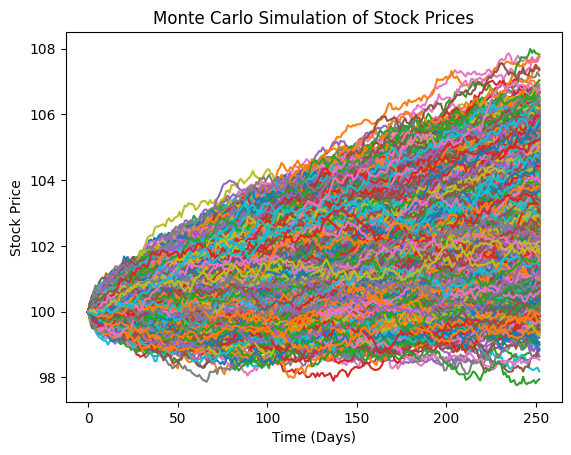

In [7]:
# Example usage
S = 100 # Current Stock Price
r = 0.05
sigma = 0.2
T = 1
N = 10000
options = [{'quantity': 10, 'strike': 110, 'type': 'call'},
           {'quantity': 5, 'strike': 90, 'type': 'put'},
           {'quantity': 20, 'strike': 100, 'type': 'call'}]

# Monte Carlo simulation of stock prices
stock_prices = simulate_stock_prices(S, r, sigma, T, N)
for i in range(N):
    stock_prices = np.array(stock_prices)
    plt.plot(stock_prices[i, :])
plt.title("Monte Carlo Simulation of Stock Prices")
plt.xlabel("Time (Days)")
plt.ylabel("Stock Price")
plt.show()

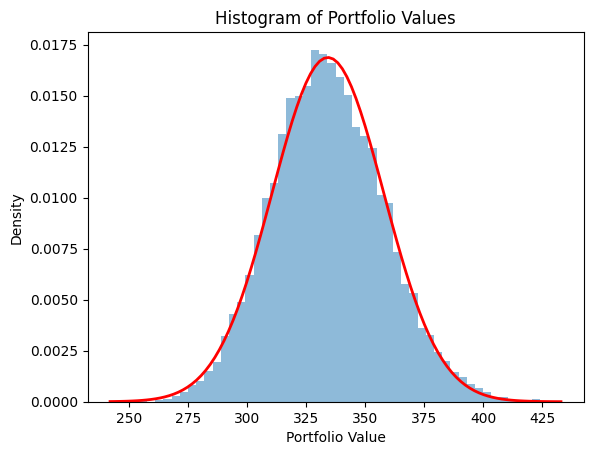

The probability of losing money is 0.00%.
The 95% confidence interval for the portfolio value is [333.86, 334.79].
Expected value: 334.32


In [8]:
# Histogram of portfolio values
expected_value, standard_deviation, portfolio_values = estimate_portfolio_risk(S, r, sigma, T, N, options)
plt.hist(portfolio_values, bins=50, density=True, alpha=0.5)
x_min, x_max = plt.xlim()
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, expected_value, standard_deviation)
plt.plot(x, y, 'r', linewidth=2)
plt.title("Histogram of Portfolio Values")
plt.xlabel("Portfolio Value")
plt.ylabel("Density")
plt.show()

# Probability of losing money
loss_probability = np.mean(portfolio_values < 0)
print("The probability of losing money is {:.2%}.".format(loss_probability))

# Below code calculates the 95% confidence interval of a sample mean using the standard normal distribution.

# expected_value is the sample mean, i.e., the sum of all values in the sample divided by the sample size N.
# standard_deviation is the standard deviation of the sample.
# N is the sample size.
# The 95% confidence interval is calculated using the formula:
# expected_value ± z * standard_deviation / √N

# where z is the critical value of the standard normal distribution for a 95% confidence interval, which is approximately 1.96.

# Therefore, lower_bound and upper_bound are the lower and upper limits of the 95% confidence interval, respectively, 
# for the sample mean. These limits represent a range of values in which the true population mean is expected 
# to lie with a 95% probability.


# 95% confidence interval for portfolio value
lower_bound = expected_value - 1.96 * standard_deviation / np.sqrt(N)
upper_bound = expected_value + 1.96 * standard_deviation / np.sqrt(N)
print("The 95% confidence interval for the portfolio value is [{:.2f}, {:.2f}].".format(lower_bound, upper_bound))
print(f"Expected value: {expected_value:.2f}")